# この課題の目的
・コーディング力を向上させる  
・スクラッチを通して決定木を理解する  
・複雑なアルゴリズムの実装に慣れる

**※課題提出時の感想**  
本課題を実施した結果、上記の目的はおおよそ達成できたと思います。３点目はまだまだだと思います。また、最適なclassを作成できたかと言うと、もっとちゃんとしたのを作成しないと業務では使えないと思います。とりあえず、今回の課題の決定木のスクラッチを動作させて学習・推論・グラフ描画するところまでたどり着けることをゴールとしました。  
この課題の難しかったところは、実装ももちろん大変だったのですが、要件（目指すゴール＝推論で何を出したいのか。何をどのように学習させるのか）を把握することに時間を取られました。


**課題として提示されているが出来ていない点**  
・ノードを扱うクラスの作成  
・探索を行うメソッドの作成  
・評価  
・オプション（剪定）  
・他のデータセットへの適用  
・Sckit-learnによる実装  


# データセットの用意


In [1]:
import numpy as np
import pandas as pd
X = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
       [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
       [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
       [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
       [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
       [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
       [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
       [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
       [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
       [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
       [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
       [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
       [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
       [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
       [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
       [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
       [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
       [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
       [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
       [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])
#y = np.array([0, 0, 1, 1])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [2]:
X.shape, y.shape

((40, 2), (40,))

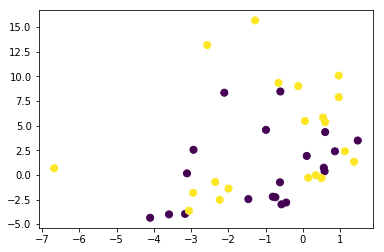

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X[:, 0], X[:, 1], s=50, c=y, marker='o')
plt.show()

# テストデータの分割
学習用（train）8割、検証用（val）2割に分割する。シャッフルは必要ない。

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, stratify=y)

## ScratchDecesionTreeClassifier

In [52]:
class ScratchDecesionTreeClassifier:

    def __init__(self):
        import numpy as np
        import pandas as pd
    
    # 情報利得（information gain）求める関数
    def _info_gain(self, I_total, I_A, I_B, nodeA_class0, nodeA_class1):

        total_class0 = np.sum(self.y==0, axis=0)  # 0ラベルの個数
        total_class1 = np.sum(self.y==1, axis=0)  # 1ラベルの個数

        # ノードA/Bのサンプル数
        nodeA_count = nodeA_class0 + nodeA_class1
        nodeB_count = len(self.X) - nodeA_count

        # 情報利得の算出
        info_gain = I_total - (I_A * ( nodeA_count / len(self.X)) + I_B * ( nodeB_count / len(self.X)))

        return info_gain
    
    # ジニ不純度（ジニ係数）を求める関数
    def _gini_impurity(self, nodeA_class0, nodeA_class1):
        # 全体
        total_count = len(self.X)   # 全体の個数
        total_class0 = np.sum(self.y==0, axis=0)  # 0ラベルの個数
        total_class1 = np.sum(self.y==1, axis=0)  # 1ラベルの個数
    
        # ノードAのサンプル数
        nodeA_count = nodeA_class0 + nodeA_class1
    
        # ノードBのサンプル数、class0の数、class1の数
        nodeB_count = total_count - nodeA_count
        nodeB_class0 = total_class0 - nodeA_class0
        nodeB_class1 = total_class1 - nodeA_class1

        # ルートのジニ係数
        I_total = 1 - ((total_class0     / total_count)**2  +  (total_class1 / total_count)**2)

        # ノードAのジニ係数
        if nodeA_count == 0:
            I_A = 0
        else:
            I_A = 1 - ((nodeA_class0 / nodeA_count)**2 + (nodeA_class1 / nodeA_count)**2)

        # ノードBのジニ係数
        if nodeB_count == 0:
            I_B = 0
        else:
            I_B = 1 - ((nodeB_class0 / nodeB_count)**2  + (nodeB_class1 / nodeB_count)**2)

        return I_total, I_A, I_B

    
    # ノード分割する（場合分けする）
    def _divide_nodeA_or_nodeB(self, col):
        ig_box = np.array([])
        
        for i in range(len(self.X)):
        
            # 全体と行を大小比較してTrue/Falseをゲットする！
            nodeA = self.X[:, col] >= self.X[i, col]    
            nodeB = self.X[:, col] < self.X[i, col]

            # ジニ変数を取得する。ここが大事で、とても勉強になった書き方
            I_total, I_A, I_B = self._gini_impurity(np.sum(self.y[nodeA] == 0, axis=0), np.sum(self.y[nodeA] == 1, axis=0))
            
            # 情報利得をゲットする
            ig_box = np.append(ig_box, self._info_gain(I_total, I_A, I_B, np.sum(self.y[nodeA] == 0, axis=0),np.sum(self.y[nodeA] == 1, axis=0)))
            
        return ig_box
    
    # 学習する（学習というより、Xの中から最適な座標点を探す）
    def fit(self, X, y):
        self.X = X
        self.y = y
        ig_box0 = self._divide_nodeA_or_nodeB(0)
        ig_box1 = self._divide_nodeA_or_nodeB(1)

        # X0とX1の情報利得を統合する
        ig_box_all = np.concatenate([ig_box0, ig_box1])

        # 最大の情報利得をもつ値のインデックスを取得する
        max_index = np.argmax(ig_box_all)

        # 商（インデックス（71）÷40） →　カラム
        self.max_index_col = max_index//ig_box0.shape[0]

        # 余り（インデックス（71）÷40） →　列
        self.max_index_i = max_index%ig_box0.shape[0]
        
        # 閾値で分類したnodeA/Bそれぞのノードのクラス（0 or 1）をカウントする
        nA_count = self.X[:, self.max_index_col] >= self.X[self.max_index_i, self.max_index_col]
        nB_count = self.X[:, self.max_index_col] < self.X[self.max_index_i, self.max_index_col]

        classA0 = np.sum(y[nA_count] == 0, axis=0)
        classA1 = np.sum(y[nA_count] == 1, axis=0)
        
        classB0 = np.sum(y[nB_count] == 0, axis=0)
        classB1 = np.sum(y[nB_count] == 1, axis=0)
        
        # 閾値で分けたnodeA,nodeBのクラスを取得する
        if classA0 > classA1:
            self.nodeA_confirm_class = 0
            self.nodeB_confirm_class = 1
        else:
            self.nodeA_confirm_class = 1
            self.nodeB_confirm_class = 0
        
        print("インデックス, カラム：", self.max_index_i, self.max_index_col)
        print("情報利得の最大値", ig_box_all[max_index])
        print("切る位置（＝閾値）", self.X[self.max_index_i, self.max_index_col])
    
    # 予測する
    def predict(self, X):
        
        # 予測結果の枠を作成
        pred = np.zeros(len(X)).astype(int)
        
        # fitで求めた閾値と、予測する列の値を比較する。True,Falseを変数に代入する
        nodeA = X[:, self.max_index_col] >= self.X[self.max_index_i, self.max_index_col]    
        nodeB = X[:, self.max_index_col] < self.X[self.max_index_i, self.max_index_col]
        
        # pred
        pred[nodeA] = self.nodeA_confirm_class
        pred[nodeB] = self.nodeB_confirm_class
        
        return pred
                         

In [56]:
# インスタンス1作成
sdtc1 = ScratchDecesionTreeClassifier()

# 学習1
sdtc1.fit(X, y)
print("")

# インスタンス2作成
sdtc2 = ScratchDecesionTreeClassifier()

# 学習2（訓練とテストでデータを分けた場合）
sdtc2.fit(X_train, y_train)

インデックス, カラム： 31 1
情報利得の最大値 0.07680250783699061
切る位置（＝閾値） 5.3524

インデックス, カラム： 22 1
情報利得の最大値 0.11835748792270528
切る位置（＝閾値） 5.3524


In [57]:
# 推論1（fitとpredictで使うX,yが同じ場合）
sdtc1.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [58]:
# 推論（fitとpredictで使うX,yを分けた場合）
sdtc2.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1])

インデックス, カラム： 31 1
情報利得の最大値 0.07680250783699061
切る位置（＝閾値） 5.3524


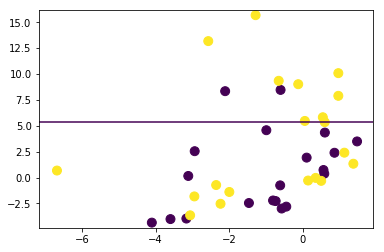

In [60]:
# グラフで可視化
from matplotlib.colors import ListedColormap
import  matplotlib.pyplot as plt 
%matplotlib inline

# 可視化関数
def plot_decision_regions(X, model):
    plt.scatter(X[:,0], X[:,1], s=80, c=y, marker='o')

    #サポートベクターも同様にプロット
    step = 0.1
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    pred = model.predict(mesh).reshape(mesh_f0.shape)
    plt.contour(mesh_f0, mesh_f1, pred, 1)
    plt.show()

tree = ScratchDecesionTreeClassifier()
tree.fit(X, y)
plot_decision_regions(X, tree)

# 説明

**決定木とは何か**  
決定木は、クラス分類と回帰タスクに広く用いられるモデルです。決定木はYes/Noで答えられる質問で構成された階層的な木構造を学習するものです。このようなモデルを手で作るのではなく、データから教師あり学習によって作ることができる点がポイントです。

**ロジスティック回帰やSVMとの違い**  
「ロジスティック回帰」と「SVM」は重みパラメータを勾配降下法で学習することができるが、決定木は重みパラメータという思想がないので、勾配降下法は利用しません。  
  
  
**ジニ不純度とは何か。例えばどのようなときに最大になるか**  
ジニ不純度とは、どのくらい混じっているかを表すものです。  
そのノードに分類された、「クラスの割合い」が高いと、ジニ係数は高い値となります。（全然分離できていない状態）  
そのノードに分類された、「クラスの割合い」が低いと、ジニ係数は低い値になります。（ちゃんと分離できている状態）  　


**決定木は情報利得をどのように使うことで学習するか**  
今回実施したCART法では、情報利得（親のジニ係数　ー　（子ノード1のジニ係数*(x/100) + 子ノード2のジニ係数*(y/100)））が最大となるサンプルデータを見つけることが最大の目的です。そのため、パラメータを勾配降下法で学習するというよりか、一番ちゃんと分類できる点を**探すこと**が学習と呼ばれています。  
※x + y = 100



## 以下に記載しているコードは練習で使用したコードや、class作成前の関数となりますので、無視してください。

In [11]:
# pre = np.zeros(len(X_test)).astype(int)
# nodeA = np.array([True,True,True,True,True,True,True, False])

# pre[nodeA] = 1

# print(pre)
# print(nodeA)

In [12]:
# pandasのDataFrameにしてみた
# XX = pd.DataFrame(X)
# XX.iloc[31,1]
#XX
# pandasのDataFrame形式で参照してみる

In [13]:
# def divide_nodeA_or_nodeB(X, col):
#     ig_box = np.array([])

#     for i in range(len(X)):
        
#         # X0（もしくはX1）全体と、X0（もしくはX1）のある行を比較して大小をTrue/Falseでゲットする！
#         nodeA = X[:, col] >= X[i, col]    
#         nodeB = X[:, col] < X[i, col]
        
#         #print("ループ：",i,"nodeA-class0の数：" ,np.sum(y[nodeA] == 0, axis=0))
#         #print("ループ：",i,"nodeA-class1の数:" ,np.sum(y[nodeA] == 1, axis=0))
         
#         #print(y[nodeB]) 
#         #print("ループ：",i,"nodeB-class0の数：" ,np.sum(y[nodeB] == 0, axis=0))
#         #print("ループ：",i,"nodeB-class1の数:" ,np.sum(y[nodeB] == 1, axis=0))

#         #d, e, f = gini_impurity(X, np.sum(y[nodeB] == 0, axis=0), np.sum(y[nodeB] == 1, axis=0))
#         #print("nodeBのジニ変数",d,"--",e,"--",f)
        
#         # 全体/nodeA/Bのジニ変数を取得する
#         I_total, I_A, I_B = gini_impurity(X, np.sum(y[nodeA] == 0, axis=0), np.sum(y[nodeA] == 1, axis=0))
#         #print("nodeAのジニ変数", I_total,"--", I_A,"--", I_B)
        
#         #print("情報利得：",i,"---",information_gain(I_total, I_A, I_B))
#         ig_box = np.append(ig_box, information_gain(X, I_total, I_A, I_B, np.sum(y[nodeA] == 0, axis=0),np.sum(y[nodeA] == 1, axis=0)))
#     return ig_box

In [14]:
# # ジニ不純度（ジニ係数）を求める関数
# def gini_impurity(X, nodeA_class0, nodeA_class1):
#     # 全体
#     total_count = len(X)   # 全体の個数
#     total_class0 = np.sum(y==0, axis=0)  # 0ラベルの個数
#     total_class1 = np.sum(y==1, axis=0)  # 1ラベルの個数
    
#     # ノードAのサンプル数
#     nodeA_count = nodeA_class0 + nodeA_class1
    
#     # ノードBのサンプル数、class0の数、class1の数
#     nodeB_count = total_count - nodeA_count
#     nodeB_class0 = total_class0 - nodeA_class0
#     nodeB_class1 = total_class1 - nodeA_class1
    
#     # ルートのジニ係数
#     I_total = 1 - ((total_class0     / total_count)**2  +  (total_class1 / total_count)**2)
    
#     # ノードAのジニ係数
#     if nodeA_count == 0:
#         I_A = 0
#     else:
#         I_A = 1 - ((nodeA_class0 / nodeA_count)**2 + (nodeA_class1 / nodeA_count)**2)
    
#     # ノードBのジニ係数
#     if nodeB_count == 0:
#         I_B = 0
#     else:
#         I_B = 1 - ((nodeB_class0 / nodeB_count)**2  + (nodeB_class1 / nodeB_count)**2)
    
#     return I_total, I_A, I_B

In [15]:
# # 情報利得（information gain）求める関数
# def information_gain(X, I_total, I_A, I_B, nodeA_class0, nodeA_class1):

#     total_class0 = np.sum(y==0, axis=0)  # 0ラベルの個数
#     total_class1 = np.sum(y==1, axis=0)  # 1ラベルの個数
    
#     # ノードA/Bのサンプル数
#     nodeA_count = nodeA_class0 + nodeA_class1
#     nodeB_count = len(X) - nodeA_count

#     # 情報利得の算出
#     info_gain = I_total - (I_A * ( nodeA_count / len(X)) + I_B * ( nodeB_count / len(X)))

#     return info_gain

In [16]:
# ig_box0 = divide_nodeA_or_nodeB(X, 0)
# ig_box1 = divide_nodeA_or_nodeB(X, 1)

# # X0とX1の情報利得を統合する
# ig_box_all = np.concatenate([ig_box0, ig_box1])

# # 最大の情報利得のインデックスを取得する
# max_index = np.argmax(ig_box_all)

# # 商（インデックス（71）÷40） →　カラム
# max_index_col = max_index//ig_box0.shape[0]

# # 余り（インデックス（71）÷40） →　列インデックス
# max_index_i = max_index%ig_box0.shape[0]

# # 列、カラム
# print("インデックス, カラム：",max_index_i, max_index_col)

# print("情報利得の最大値",ig_box_all[max_index])

# print("切る位置（＝閾値）", X[max_index_i, max_index_col])

In [17]:
#X0が閾値（例えば0.2）以上のインデックスを返す
# np.where(X[:, 0]>0.2)

In [18]:
# 閾値をX0軸でのみ調べる
# for i in X:
#     a = i[0]
#     for j in 
#     np.where(i[0] > a)

In [19]:
# for i in range(len(X)):
#     print('----')
#     for j in range(3):
#         print(X[i,j])

In [20]:
# お蔵入り（こんなに場合分けする必要ないし）
# nodeA or nodeBへ場合分けする
# def divide_nodeA_or_nodeB(X):
#     for i in range(len(X)):
#         nodeA = []
#         nodeB = []
#         for j in range(len(X)):      
#             # X0で場合分けする
#             if X[i, 0] >= X[j, 0]:              
#                 # nodeAに振り分ける
#                 nodeA.append(X[j, [0, 2]])
#             else:         
#                 # nodeBに振り分ける
#                 nodeB.append(X[j, [0, 2]])
#             print("i:",i,"--","j:",j,"--","nodeA:",len(nodeA),"class0:", "sa" ,"class1:","a" ,"--------" ,"nodeB:",len(nodeB))

In [21]:
# a = np.array([3,5,7])
# y = np.array([0,1,0])
# b = np.array([True, False, True])
# a[b]

In [22]:
# th  =4

# big = a > th
# small = a<=th

In [23]:
# a[big]
# a[small]

In [24]:
# y[big]
# y[small]